# This notebook produces Fig. 13
### note that the parameter kappa in the paper is called omega in the filename of the file containing the data

In [1]:
import numpy as np
from math import exp,sqrt,log, pi, sin, cos
import math
import numpy.random as rand
import timeit

from scipy.interpolate import spline

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import sys
import os
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
   sys.path.append(nb_dir)
import timeit

from scipy.stats import chi2
from scipy.fftpack import fft, fft2
from scipy.signal import argrelextrema

from scipy import signal

In [2]:
f1 = [4.0, 4.8]
f2 = [4.0, 3.2]
m1 = [2.0, 2.29]
m2 = [2.0, 1.71]
#omega = [0, 0.25, 0.5, 0.75, 1]
omega = [0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 1]

ID_LETT = ['A','B','C','D','E','F','G','H']
ID_LETT_INDEX = 0

om_index_range = len(omega)
choose_fcond = 0 #0 or 1

choiceCross = []
DTcross = []
choiceMddm = []
DTmddm = []
#filepath = 'DistributionDTData_Continuous_Mag1_' + str(choose_m1) + '_Mag2_' + str(m2)

f_index = 0
m_index = 0
choose_f1 = f1[f_index]
choose_f2 = f2[f_index]
choose_m1 = m1[m_index]
choose_m2 = m2[m_index]
    
for om_index in range(om_index_range):
    choose_omega = omega[om_index]
    print(str(ID_LETT[ID_LETT_INDEX])+': ' , 'omega = ', choose_omega, 'f1 = ', choose_f1, 'f2 = ', choose_f2, 'rho_f = ', choose_f1/choose_f2, 'm1 = ', choose_m1, 'm2 = ', choose_m2, 'rho_m = ', choose_m1/choose_m2)
    filepath = './DataFiles/DistributionDTData_Freq1_' + str(choose_f1) + '_Freq2_' + str(choose_f2) + '_Mag1_' + str(choose_m1) + '_Mag2_' + str(choose_m2) + '_FreqCond_' + str(choose_fcond) + '_Omega_' + str(choose_omega)
    with open(str(filepath) + '.csv', 'r') as infile:
        infile.readline
        for line in infile:
            if not line.startswith('#'): # I usually use the first line in a data file to give some info using "#" 
                choiceCross.append(float(line.split(',')[0]))
                DTcross.append(float(line.split(',')[1]))  # "split" separates all objects in a line when delimeter "," occurs
                choiceMddm.append(float(line.split(',')[2]))
                DTmddm.append(float(line.split(',')[3]))  # all objects in the data file are strings 
    ID_LETT_INDEX += 1
                    

A:  omega =  0 f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  2.0 m2 =  2.0 rho_m =  1.0
B:  omega =  0.05 f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  2.0 m2 =  2.0 rho_m =  1.0
C:  omega =  0.1 f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  2.0 m2 =  2.0 rho_m =  1.0
D:  omega =  0.15 f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  2.0 m2 =  2.0 rho_m =  1.0
E:  omega =  0.2 f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  2.0 m2 =  2.0 rho_m =  1.0
F:  omega =  0.25 f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  2.0 m2 =  2.0 rho_m =  1.0
G:  omega =  0.5 f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  2.0 m2 =  2.0 rho_m =  1.0
H:  omega =  1 f1 =  4.0 f2 =  4.0 rho_f =  1.0 m1 =  2.0 m2 =  2.0 rho_m =  1.0


In [3]:
len(choiceCross)

800000

In [16]:
tlen = 100000
DTcross = np.asarray(DTcross)
DTmddm = np.asarray(DTmddm)

whichDistr = "both" # "both", "false", or "correct" 

choiceCrossA = choiceCross[0:tlen]
DTcrossA = DTcross[0:tlen]
choiceCrossB = choiceCross[tlen:2*tlen]
DTcrossB = DTcross[tlen:2*tlen]
choiceCrossC = choiceCross[2*tlen:3*tlen]
DTcrossC = DTcross[2*tlen:3*tlen]
choiceCrossD = choiceCross[3*tlen:4*tlen]
DTcrossD = DTcross[3*tlen:4*tlen]
choiceCrossE = choiceCross[4*tlen:5*tlen]
DTcrossE = DTcross[4*tlen:5*tlen]
choiceCrossF = choiceCross[5*tlen:6*tlen]
DTcrossF = DTcross[5*tlen:6*tlen]
choiceCrossG = choiceCross[6*tlen:7*tlen]
DTcrossG = DTcross[6*tlen:7*tlen]
choiceCrossH = choiceCross[7*tlen:8*tlen]
DTcrossH = DTcross[7*tlen:8*tlen]
"""
choiceCrossI = choiceCross[8*tlen:9*tlen]
DTcrossI = DTcross[8*tlen:9*tlen]
choiceCrossJ = choiceCross[9*tlen:10*tlen]
DTcrossJ = DTcross[9*tlen:10*tlen]
choiceCrossK = choiceCross[10*tlen:11*tlen]
DTcrossK = DTcross[10*tlen:11*tlen]
choiceCrossL = choiceCross[11*tlen:12*tlen]
DTcrossL = DTcross[11*tlen:12*tlen]
choiceCrossM = choiceCross[12*tlen:13*tlen]
DTcrossM = DTcross[12*tlen:13*tlen]
choiceCrossN = choiceCross[13*tlen:14*tlen]
DTcrossN = DTcross[13*tlen:14*tlen]
choiceCrossO = choiceCross[14*tlen:15*tlen]
DTcrossO = DTcross[14*tlen:15*tlen]
choiceCrossP = choiceCross[15*tlen:16*tlen]
DTcrossP = DTcross[15*tlen:16*tlen]
"""
choiceMddmA = choiceMddm[0:tlen]
DTmddmA = DTmddm[0:tlen]
choiceMddmB = choiceMddm[tlen:2*tlen]
DTmddmB = DTmddm[tlen:2*tlen]
choiceMddmC = choiceMddm[2*tlen:3*tlen]
DTmddmC = DTmddm[2*tlen:3*tlen]
choiceMddmD = choiceMddm[3*tlen:4*tlen]
DTmddmD = DTmddm[3*tlen:4*tlen]
choiceMddmE = choiceMddm[4*tlen:5*tlen]
DTmddmE = DTmddm[4*tlen:5*tlen]
choiceMddmF = choiceMddm[5*tlen:6*tlen]
DTmddmF = DTmddm[5*tlen:6*tlen]
choiceMddmG = choiceMddm[6*tlen:7*tlen]
DTmddmG = DTmddm[6*tlen:7*tlen]
choiceMddmH = choiceMddm[7*tlen:8*tlen]
DTmddmH = DTmddm[7*tlen:8*tlen]
"""
choiceMddmI = choiceMddm[8*tlen:9*tlen]
DTmddmI = DTmddm[8*tlen:9*tlen]
choiceMddmJ = choiceMddm[9*tlen:10*tlen]
DTmddmJ = DTmddm[9*tlen:10*tlen]
choiceMddmK = choiceMddm[10*tlen:11*tlen]
DTmddmK = DTmddm[10*tlen:11*tlen]
choiceMddmL = choiceMddm[11*tlen:12*tlen]
DTmddmL = DTmddm[11*tlen:12*tlen]
choiceMddmM = choiceMddm[12*tlen:13*tlen]
DTmddmM = DTmddm[12*tlen:13*tlen]
choiceMddmN = choiceMddm[13*tlen:14*tlen]
DTmddmN = DTmddm[13*tlen:14*tlen]
choiceMddmO = choiceMddm[14*tlen:15*tlen]
DTmddmO = DTmddm[14*tlen:15*tlen]
choiceMddmP = choiceMddm[15*tlen:16*tlen]
DTmddmP = DTmddm[15*tlen:16*tlen]
"""
if whichDistr == "false" or whichDistr == "correct":
    if whichDistr == "false":
        corr_false = 2 # 1 or 2
    else:
        corr_false = 1
    DTcrossA=[DTcrossA[kk] for kk in range(len(DTcrossA)) if choiceCrossA[kk]==corr_false]
    DTcrossB=[DTcrossB[kk] for kk in range(len(DTcrossB)) if choiceCrossB[kk]==corr_false]
    DTcrossC=[DTcrossC[kk] for kk in range(len(DTcrossC)) if choiceCrossC[kk]==corr_false]
    DTcrossD=[DTcrossD[kk] for kk in range(len(DTcrossD)) if choiceCrossD[kk]==corr_false]
    DTcrossE=[DTcrossE[kk] for kk in range(len(DTcrossE)) if choiceCrossE[kk]==corr_false]
    DTcrossF=[DTcrossF[kk] for kk in range(len(DTcrossF)) if choiceCrossF[kk]==corr_false]
    DTcrossG=[DTcrossG[kk] for kk in range(len(DTcrossG)) if choiceCrossG[kk]==corr_false]
    DTcrossH=[DTcrossH[kk] for kk in range(len(DTcrossH)) if choiceCrossH[kk]==corr_false]
    """
    DTcrossI=[DTcrossI[kk] for kk in range(len(DTcrossI)) if choiceCrossI[kk]==corr_false]   
    DTcrossJ=[DTcrossJ[kk] for kk in range(len(DTcrossJ)) if choiceCrossJ[kk]==corr_false]
    DTcrossK=[DTcrossK[kk] for kk in range(len(DTcrossK)) if choiceCrossK[kk]==corr_false]
    DTcrossL=[DTcrossL[kk] for kk in range(len(DTcrossL)) if choiceCrossL[kk]==corr_false]
    DTcrossM=[DTcrossM[kk] for kk in range(len(DTcrossM)) if choiceCrossM[kk]==corr_false]
    DTcrossN=[DTcrossN[kk] for kk in range(len(DTcrossN)) if choiceCrossN[kk]==corr_false]
    DTcrossO=[DTcrossO[kk] for kk in range(len(DTcrossO)) if choiceCrossO[kk]==corr_false]
    DTcrossP=[DTcrossP[kk] for kk in range(len(DTcrossP)) if choiceCrossP[kk]==corr_false]
    """
    
    DTmddmA=[DTmddmA[kk] for kk in range(len(DTmddmA)) if choiceMddmA[kk]==corr_false]
    DTmddmB=[DTmddmB[kk] for kk in range(len(DTmddmB)) if choiceMddmB[kk]==corr_false]
    DTmddmC=[DTmddmC[kk] for kk in range(len(DTmddmC)) if choiceMddmC[kk]==corr_false]
    DTmddmD=[DTmddmD[kk] for kk in range(len(DTmddmD)) if choiceMddmD[kk]==corr_false]
    DTmddmE=[DTmddmE[kk] for kk in range(len(DTmddmE)) if choiceMddmE[kk]==corr_false]
    DTmddmF=[DTmddmF[kk] for kk in range(len(DTmddmF)) if choiceMddmF[kk]==corr_false]
    DTmddmG=[DTmddmG[kk] for kk in range(len(DTmddmG)) if choiceMddmG[kk]==corr_false]
    DTmddmH=[DTmddmH[kk] for kk in range(len(DTmddmH)) if choiceMddmH[kk]==corr_false]
    """
    DTmddmI=[DTmddmI[kk] for kk in range(len(DTmddmI)) if choiceMddmI[kk]==corr_false]
    DTmddmJ=[DTmddmJ[kk] for kk in range(len(DTmddmJ)) if choiceMddmJ[kk]==corr_false]
    DTmddmK=[DTmddmK[kk] for kk in range(len(DTmddmK)) if choiceMddmK[kk]==corr_false]
    DTmddmL=[DTmddmL[kk] for kk in range(len(DTmddmL)) if choiceMddmL[kk]==corr_false]
    DTmddmM=[DTmddmM[kk] for kk in range(len(DTmddmM)) if choiceMddmM[kk]==corr_false]
    DTmddmN=[DTmddmN[kk] for kk in range(len(DTmddmN)) if choiceMddmN[kk]==corr_false]
    DTmddmO=[DTmddmO[kk] for kk in range(len(DTmddmO)) if choiceMddmO[kk]==corr_false]
    DTmddmP=[DTmddmP[kk] for kk in range(len(DTmddmP)) if choiceMddmP[kk]==corr_false]
    """

In [17]:
len(DTcrossH)

100000

In [18]:
def getResponseProportion(choice):
    choice = np.asarray(choice)
    opt1 = choice[choice==1]
    opt2 = choice[choice==2]
    undecided = choice[choice==100]
    return len(opt1)/len(choice), len(opt2)/len(choice), len(undecided)/len(choice)
getResponseProportion(choiceCrossA)

(0.49961, 0.50039, 0.0)

In [19]:
roundDigit = 3
print('meanDTcrossA = ', round(np.mean(DTcrossA),roundDigit))
print('choiceCrossA = ', np.round(getResponseProportion(choiceCrossA),roundDigit))
print('meanDTcrossB = ', round(np.mean(DTcrossB),roundDigit))
print('choiceCrossB = ', np.round(getResponseProportion(choiceCrossB),roundDigit))
print('meanDTcrossC = ', round(np.mean(DTcrossC),roundDigit))
print('choiceCrossC = ', np.round(getResponseProportion(choiceCrossC),roundDigit))
print('meanDTcrossD = ', round(np.mean(DTcrossD),roundDigit))
print('choiceCrossD = ', np.round(getResponseProportion(choiceCrossD),roundDigit))
print('meanDTcrossE = ', round(np.mean(DTcrossE),roundDigit))
print('choiceCrossE = ', np.round(getResponseProportion(choiceCrossE),roundDigit))
print('meanDTcrossF = ', round(np.mean(DTcrossF),roundDigit))
print('choiceCrossF = ', np.round(getResponseProportion(choiceCrossF),roundDigit))
print('meanDTcrossG = ', round(np.mean(DTcrossG),roundDigit))
print('choiceCrossG = ', np.round(getResponseProportion(choiceCrossG),roundDigit))
print('meanDTcrossH = ', round(np.mean(DTcrossH),roundDigit))
print('choiceCrossH = ', np.round(getResponseProportion(choiceCrossH),roundDigit))

print('meanDTmddmA = ', round(np.mean(DTmddmA), roundDigit))
print('choiceMddmA = ', np.round(getResponseProportion(choiceMddmA),roundDigit))
print('meanDTmddmB = ', round(np.mean(DTmddmB), roundDigit))
print('choiceMddmB = ', np.round(getResponseProportion(choiceMddmB),roundDigit))
print('meanDTmddmC = ', round(np.mean(DTmddmC), roundDigit))
print('choiceMddmC = ', np.round(getResponseProportion(choiceMddmC),roundDigit))
print('meanDTmddmD = ', round(np.mean(DTmddmD), roundDigit))
print('choiceMddmD = ', np.round(getResponseProportion(choiceMddmD),roundDigit))
print('meanDTmddmE = ', round(np.mean(DTmddmE), roundDigit))
print('choiceMddmE = ', np.round(getResponseProportion(choiceMddmE),roundDigit))
print('meanDTmddmF = ', round(np.mean(DTmddmF), roundDigit))
print('choiceMddmF = ', np.round(getResponseProportion(choiceMddmF),roundDigit))
print('meanDTmddmG = ', round(np.mean(DTmddmG), roundDigit))
print('choiceMddmG = ', np.round(getResponseProportion(choiceMddmG),roundDigit))
print('meanDTmddmH = ', round(np.mean(DTmddmH), roundDigit))
print('choiceMddmH = ', np.round(getResponseProportion(choiceMddmH),roundDigit))

meanDTcrossA =  1.513
choiceCrossA =  [ 0.5  0.5  0. ]
meanDTcrossB =  1.577
choiceCrossB =  [ 0.499  0.501  0.   ]
meanDTcrossC =  1.656
choiceCrossC =  [ 0.497  0.503  0.   ]
meanDTcrossD =  1.752
choiceCrossD =  [ 0.5  0.5  0. ]
meanDTcrossE =  1.888
choiceCrossE =  [ 0.499  0.501  0.   ]
meanDTcrossF =  2.094
choiceCrossF =  [ 0.501  0.499  0.   ]
meanDTcrossG =  2.147
choiceCrossG =  [ 0.496  0.504  0.   ]
meanDTcrossH =  1.801
choiceCrossH =  [ 0.501  0.499  0.   ]
meanDTmddmA =  1.573
choiceMddmA =  [ 0.5  0.5  0. ]
meanDTmddmB =  1.638
choiceMddmB =  [ 0.501  0.499  0.   ]
meanDTmddmC =  1.717
choiceMddmC =  [ 0.501  0.499  0.   ]
meanDTmddmD =  1.796
choiceMddmD =  [ 0.498  0.502  0.   ]
meanDTmddmE =  1.896
choiceMddmE =  [ 0.501  0.499  0.   ]
meanDTmddmF =  1.998
choiceMddmF =  [ 0.5  0.5  0. ]
meanDTmddmG =  1.891
choiceMddmG =  [ 0.501  0.499  0.   ]
meanDTmddmH =  1.532
choiceMddmH =  [ 0.501  0.499  0.   ]


<IPython.core.display.Javascript object>


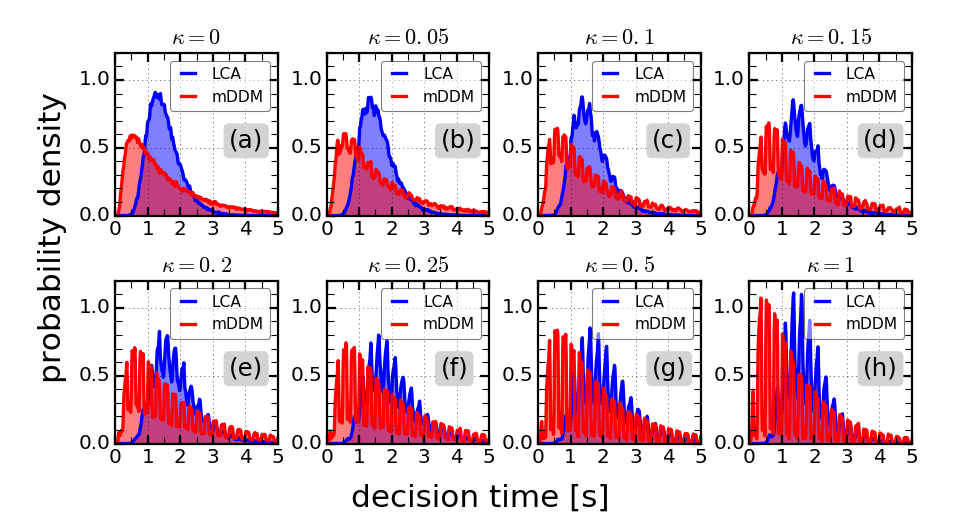

In [22]:
fig = plt.figure(figsize=(12, 6.6))

nr_row = 2
nr_col = 4

binNr = 601
bin_edges = np.linspace(0, 15, binNr, endpoint=True)

yCross,binEdgesCross=np.histogram(DTcrossA,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000)
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmA,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000)
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax1 = plt.subplot2grid((nr_row, nr_col), (0, 0), colspan=1)
ax1.hist(DTcrossA, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax1.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax1.hist(DTmddmA, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax1.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax1.xaxis.label.set_size(18)
ax1.yaxis.label.set_size(18)
ax1.set_title(r'$\kappa=0$', fontsize=20, y=1.02)
ax1.tick_params(length=6, width=2, axis='both')
ax1.tick_params(axis='both', labelsize = 18)
#ax1.set_xlim([0, bin_edges[-1]])
#ax1.set_xlabel('condition')
ax1.grid(True)
#ax1.set_ylabel('probability', fontsize=22)
#ax1.set_xlabel('decision time', fontsize=22)
ax1.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True, framealpha=0.5)
ax1.text(3.5, 0.5, '(a)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

####################
yCross,binEdgesCross=np.histogram(DTcrossB,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmB,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax2 = plt.subplot2grid((nr_row, nr_col), (0, 1), colspan=1, sharey=ax1)
ax2.hist(DTcrossB, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax2.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax2.hist(DTmddmB, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax2.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax2.xaxis.label.set_size(18)
ax2.yaxis.label.set_size(18)
ax2.set_title(r'$\kappa=0.05$', fontsize=20, y=1.02)
ax2.tick_params(length=6, width=2, axis='both')
ax2.tick_params(axis='both', labelsize = 18)
#ax2.set_xlim([-0.2, 3.2])
#ax2.set_xlabel('condition')
ax2.grid(True)
#ax2.set_ylabel('probability', fontsize=22)
#ax2.set_xlabel('decision time', fontsize=22)
ax2.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True, framealpha=0.5)
ax2.text(3.5, 0.5, '(b)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossC,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmC,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax3 = plt.subplot2grid((nr_row, nr_col), (0, 2), colspan=1, sharey=ax1)
ax3.hist(DTcrossC, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax3.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax3.hist(DTmddmC, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax3.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax3.xaxis.label.set_size(18)
ax3.yaxis.label.set_size(18)
ax3.set_title(r'$\kappa=0.1$', fontsize=20, y=1.02)
ax3.tick_params(length=6, width=2, axis='both')
ax3.tick_params(axis='both', labelsize = 18)
#ax3.set_xlim([-0.2, 3.2])
#ax3.set_xlabel('condition')
ax3.grid(True)
#ax3.set_ylabel('probability', fontsize=22)
#ax3.set_xlabel('decision time', fontsize=22)
ax3.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True, framealpha=0.5)
ax3.text(3.5, 0.5, '(c)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

#########################################################
#########################################################

yCross,binEdgesCross=np.histogram(DTcrossD,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmD,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax4 = plt.subplot2grid((nr_row, nr_col), (0, 3), colspan=1, sharey=ax1)
ax4.hist(DTcrossD, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax4.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax4.hist(DTmddmD, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax4.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax4.xaxis.label.set_size(18)
ax4.yaxis.label.set_size(18)
ax4.set_title(r'$\kappa=0.15$', fontsize=20, y=1.02)
ax4.tick_params(length=6, width=2, axis='both')
ax4.tick_params(axis='both', labelsize = 18)
#ax4.set_xlim([0, bin_edges[-1]])
#ax4.set_xlabel('condition')
ax4.grid(True)
#ax4.set_ylabel('probability', fontsize=22)
#ax4.set_xlabel('decision time', fontsize=22)
ax4.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True, framealpha=0.5)
ax4.text(3.5, 0.5, '(d)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

####################
yCross,binEdgesCross=np.histogram(DTcrossE,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmE,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax5 = plt.subplot2grid((nr_row, nr_col), (1, 0), colspan=1, sharey=ax1)
ax5.hist(DTcrossE, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax5.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax5.hist(DTmddmE, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax5.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax5.xaxis.label.set_size(18)
ax5.yaxis.label.set_size(18)
ax5.set_title(r'$\kappa=0.2$', fontsize=20, y=1.02)
ax5.tick_params(length=6, width=2, axis='both')
ax5.tick_params(axis='both', labelsize = 18)
#ax5.set_xlim([-0.2, 3.2])
#ax5.set_xlabel('condition')
ax5.grid(True)
#ax5.set_ylabel('probability', fontsize=22)
#ax5.set_xlabel('decision time', fontsize=22)
ax5.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True, framealpha=0.5)
ax5.text(3.5, 0.5, '(e)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


####################
yCross,binEdgesCross=np.histogram(DTcrossF,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmF,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax6 = plt.subplot2grid((nr_row, nr_col), (1, 1), colspan=1, sharey=ax1)
ax6.hist(DTcrossF, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax6.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax6.hist(DTmddmF, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax6.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax6.xaxis.label.set_size(18)
ax6.yaxis.label.set_size(18)
ax6.set_title(r'$\kappa=0.25$', fontsize=20, y=1.02)
ax6.tick_params(length=6, width=2, axis='both')
ax6.tick_params(axis='both', labelsize = 18)
#ax6.set_xlim([-0.2, 3.2])
#ax6.set_xlabel('condition')
ax6.grid(True)
#ax6.set_ylabel('probability', fontsize=22)
#ax6.set_xlabel('decision time', fontsize=22)
ax6.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True, framealpha=0.5)
ax6.text(3.5, 0.5, '(f)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))


#########################################################
#########################################################

yCross,binEdgesCross=np.histogram(DTcrossG,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmG,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax7 = plt.subplot2grid((nr_row, nr_col), (1, 2), colspan=1, sharey=ax1)
ax7.hist(DTcrossG, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax7.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax7.hist(DTmddmG, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax7.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax7.xaxis.label.set_size(18)
ax7.yaxis.label.set_size(18)
ax7.set_title(r'$\kappa=0.5$', fontsize=20, y=1.02)
ax7.tick_params(length=6, width=2, axis='both')
ax7.tick_params(axis='both', labelsize = 18)
#ax7.set_xlim([0, bin_edges[-1]])
#ax7.set_xlabel('condition')
ax7.grid(True)
#ax7.set_ylabel('probability', fontsize=22)
#ax7.set_xlabel('decision time', fontsize=22)
ax7.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True, framealpha=0.5)
ax7.text(3.5, 0.5, '(g)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

####################
yCross,binEdgesCross=np.histogram(DTcrossH,bins=bin_edges, normed=True)
bincentersCross = 0.5*(binEdgesCross[1:]+binEdgesCross[:-1])
xnewCross = np.linspace(bincentersCross.min(),bincentersCross.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothCross = spline(bincentersCross,yCross,xnewCross)
y_smoothCross[y_smoothCross < 0] = 0

yMddm,binEdgesMddm=np.histogram(DTmddmH,bins=bin_edges, normed=True)
bincentersMddm = 0.5*(binEdgesMddm[1:]+binEdgesMddm[:-1])
xnewMddm = np.linspace(bincentersMddm.min(),bincentersMddm.max(),1000) #300 represents number of points to make between T.min and T.max
y_smoothMddm = spline(bincentersMddm,yMddm,xnewMddm)
y_smoothMddm[y_smoothMddm < 0] = 0

ax8 = plt.subplot2grid((nr_row, nr_col), (1, 3), colspan=1, sharey=ax1)
ax8.hist(DTcrossH, bins=bin_edges, color='b', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax8.plot(xnewCross,y_smoothCross, lw=3, c='b', label='LCA');
ax8.hist(DTmddmH, bins=bin_edges, color='r', edgecolor='k',linewidth=0, normed=True, histtype='stepfilled',alpha=0.5)
ax8.plot(xnewMddm,y_smoothMddm, lw=3, c='r', label='mDDM');
ax8.xaxis.label.set_size(18)
ax8.yaxis.label.set_size(18)
ax8.set_title(r'$\kappa=1$', fontsize=20, y=1.02)
ax8.tick_params(length=6, width=2, axis='both')
ax8.tick_params(axis='both', labelsize = 18)
#ax8.set_xlim([-0.2, 3.2])
#ax8.set_xlabel('condition')
ax8.grid(True)
#ax8.set_ylabel('probability', fontsize=22)
#ax8.set_xlabel('decision time', fontsize=22)
ax8.legend(loc='upper right', fontsize=14, handlelength=1.5, fancybox=True, framealpha=0.5)
ax8.text(3.5, 0.5, '(h)', color='black', fontsize=22,
        bbox=dict(facecolor='lightgrey', edgecolor='lightgrey', boxstyle='round,pad=0.2'))

for ax in [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]:
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(2)
        ax.spines[axis].set_color('k')
    ax.tick_params('both', length=8, width=2, which='major')
    ax.tick_params('both', length=6, width=1, which='minor')
    ax.set_xlim([0,5])
    ax.set_ylim([0,1.2])
    ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
    ax.xaxis.set_minor_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))
    ax.yaxis.set_minor_locator(ticker.MultipleLocator(0.1))

#fig.subplots_adjust(hspace=0.3)
#fig.subplots_adjust(wspace=0.3)

fig.subplots_adjust(left=0.12, bottom=0.16, right=0.95, top=0.9,
                wspace=0.3, hspace=0.4)

fig.text(0.5, 0.04, r'decision time [s]', ha='center', fontsize=28)
fig.text(0.04, 0.55, r'probability density', va='center', rotation='vertical', fontsize=28)
    
#fig.tight_layout()

In [23]:
#fig.savefig('FigDistrOmega.png', format='png', dpi=150)